# Level:2- INTERMEDIATE LEVEL TASK
# Task:1- Exploratory Data Analysis on Dataset - Terrorism 

##  LGM | VIP | DATA SCIENCE | Internship 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset - Terrorism

In [5]:
df = pd.read_csv('globalterrorism.csv',encoding='latin1')
df.head()

C:\Users\Mushtaq\AppData\Local\Temp\ipykernel_15344\1922040904.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorism.csv',encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Check the Column values

In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Rename Columns

In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)

In [14]:
df = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"Attacktype",'kill',
               'Wound','target1','Summary','Group','Targettype','Weapon','motive']]

In [15]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,kill,Wound,target1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Check the Shape

In [16]:
df.shape

(181691, 18)

### Finding Null values

In [17]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

### Data Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

## Data Visualization

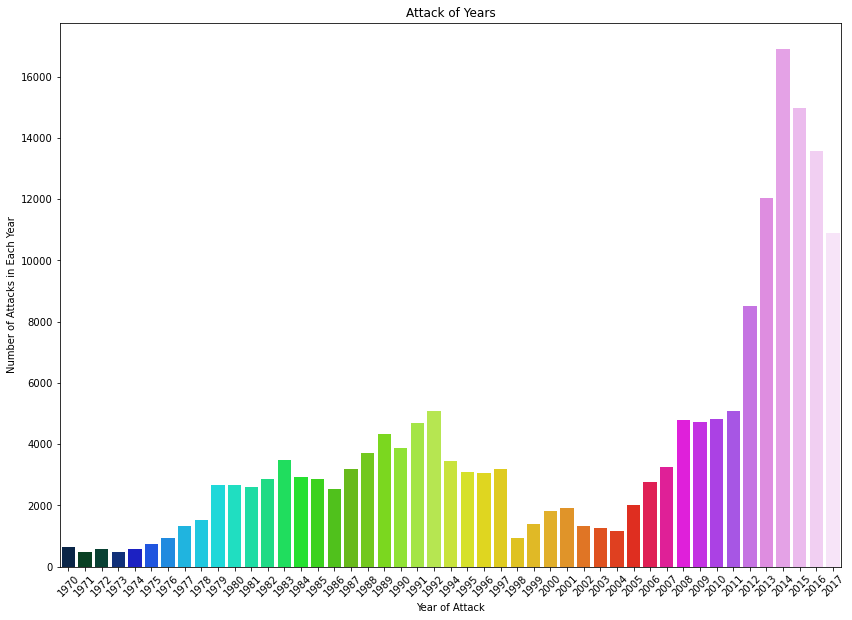

In [23]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (14,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'gist_ncar')
plt.xticks(rotation = 45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks in Each Year')
plt.title('Attack of Years')
plt.show()

c:\Users\Mushtaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


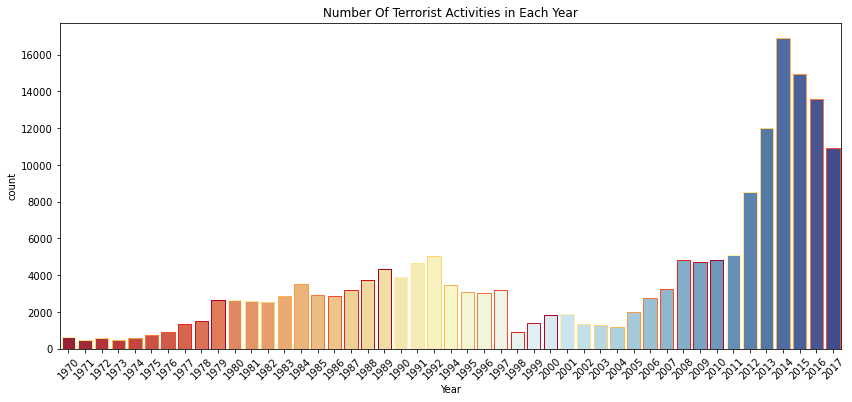

In [24]:
plt.subplots(figsize=(14,6))
sns.countplot('Year', data=df, palette='RdYlBu', edgecolor=sns.color_palette("YlOrRd", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities in Each Year')
plt.show()

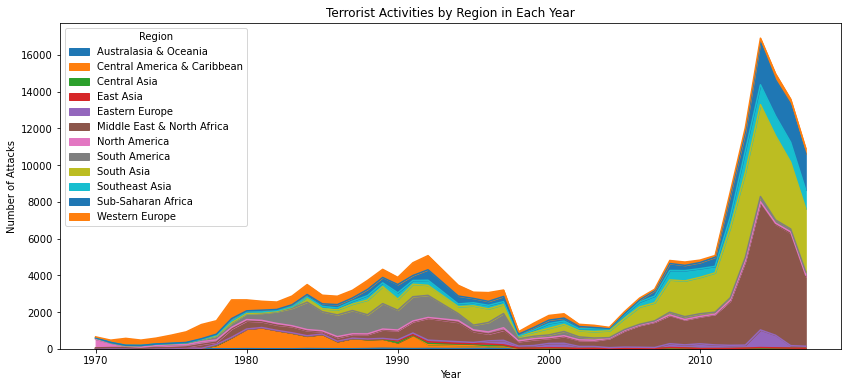

In [27]:
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(14,6))
plt.title('Terrorist Activities by Region in Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [30]:
att = df.Country.value_counts()
att.head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [33]:
df.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

### Countries Affected by Terror Attacks

c:\Users\Mushtaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


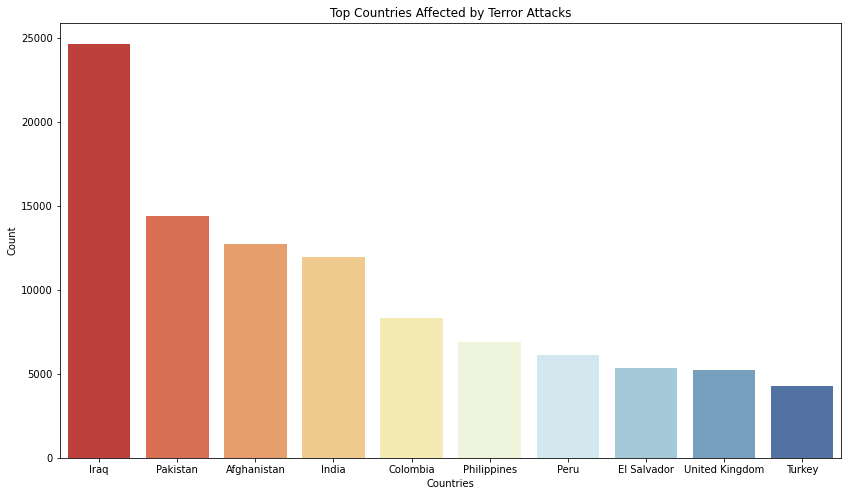

In [37]:
plt.subplots(figsize=(14,8))
sns.barplot(df['Country'].value_counts()[:10].index, df['Country'].value_counts()[:10].values, palette='RdYlBu')
plt.title('Top Countries Affected by Terror Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### Describe the Data

In [39]:
df.describe()

,Year,Month,Day,Latitude,Longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## Number of people killed in Terror Attack

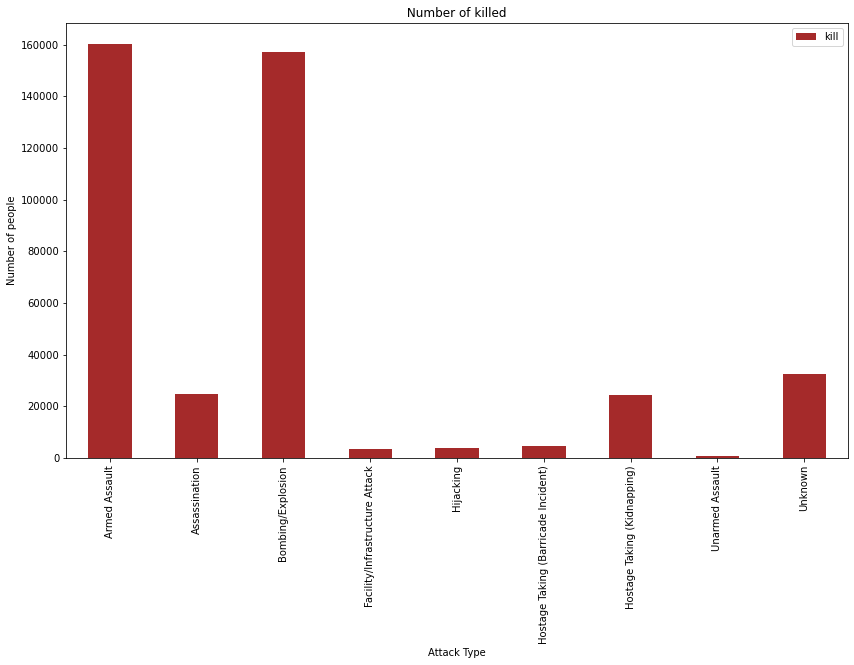

In [47]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(14,8), color='brown')
plt.title(' Number of killed ')
plt.ylabel('Number of people')
plt.xlabel('Attack Type')
plt.show()

## Top 10 Terrorist Group Attack

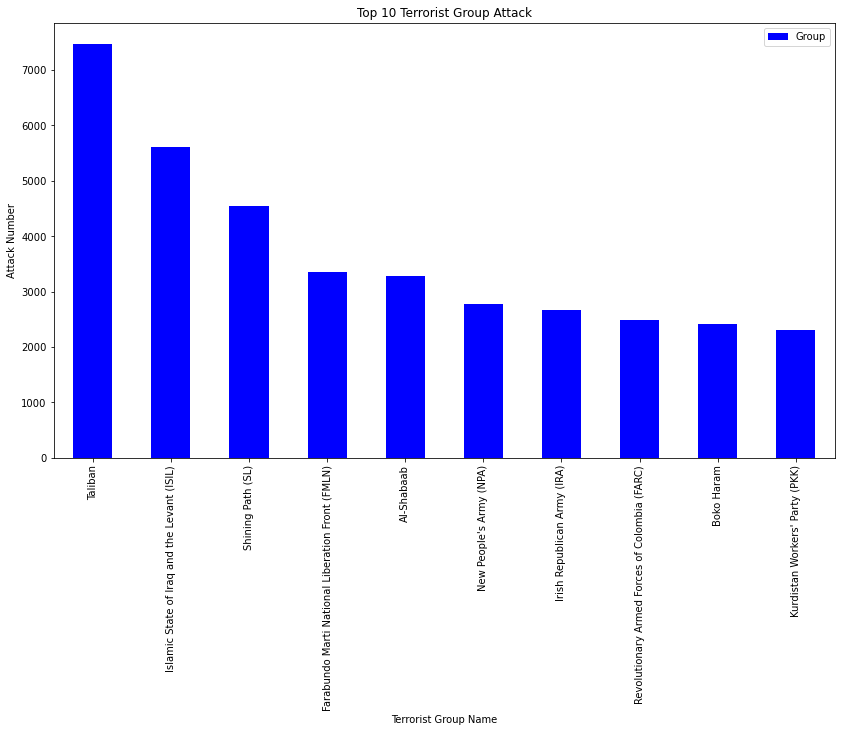

In [48]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar', color='blue', figsize=(14,8))
plt.title('Top 10 Terrorist Group Attack')
plt.xlabel('Terrorist Group Name')
plt.ylabel('Attack Number')
plt.show()

In [54]:
ds=df[['Group','Country','kill']]
ds=ds.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index()
ds.head()

C:\Users\Mushtaq\AppData\Local\Temp\ipykernel_15344\1820677889.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ds=ds.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index()


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0


### Number of people killed by Terror Attack

In [56]:
k = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(k.dropna())))

Number of people killed by terror attack: 411868


## Country with most Attacks is:

In [58]:
print("Country with the most attacks:", df['Country'].value_counts().idxmax())

Country with the most attacks: Iraq


# Done by Hifza Anjum